# NLP - Bot basado en reglas con Tensorflow
 BOT basado en una red neuronal con Tensorflow

In [25]:
import json
import string
import random
import numpy as np

import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import tensorflow as tf

import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Dropout

import pickle

In [26]:
data = {
  "intents": [
    {"tag": "nombre",
        "patterns": ["¿Cúal es tu nombre?", "¿Quién sos?"],
        "responses": ["Mi nombre es FrozenBOT", "Yo soy FrozenBOT"]
        },
    {"tag": "contacto",
        "patterns": ["contacto", "número de contacto", "número de teléfono", "número de whatsapp", "whatsapp"],
        "responses": ["Podes contactarnos al siguiente número +54-9-11-111-1111", "Contactonos al whatsapp número +54-9-11-2222-2222"]
        },
    {"tag": "envios",
        "patterns": ["¿Realizan envios?", "¿Cómo me llega el paquete?", "¿Tienen delivery?", "Tienen delivery", "¿Cuentan con servicio de delivery?"],
        "responses": ["Los envios se realizan por medio de delivery, lo enviaremos a la dirección que registres en la página"]
        },
    {"tag": "precios",
        "patterns": ["precio", "Me podrás pasar los precios", "¿Cuánto vale?", "¿Cuánto sale?", "¿Cuánto cuesta el grande?", "¿Cuánto cuesta el mediano?", "¿Cuánto cuesta el pequeño"],
        "responses": ["En el catálogo podrás encontrar los precios de todos nuestros productos en stock"]
        },
    {"tag": "pagos",
        "patterns": ["medios de pago", "tarjeta de crédito", "tarjetas", "efectivo"],
        "responses": ["Contactanos al whatsapp número +54-9-11-2154-4777 para conocer los beneficios y formas de pago vigentes"]
        },
    {"tag": "stock",
        "patterns": ["Esto está disponible", "¿Tenes stock?", "¿Hay stock?"],
        "responses": ["Los productos publicados están en stock"]
        },
    {
      "tag": "bienvenida",
      "patterns": ["Hola", "¿Cómo estás?", "¿Qué tal?"],
      "responses": ["¡Hola! Bienvenido a Heladerías Frozen.", "¡Hola, espero estes muy bien. Bienvenido a Heladerías Frozen!"]
    },
    {
      "tag": "pedido",
      "patterns": ["Quiero helado","Quiero hacer un pedido", "¿Cómo puedo ordenar?", "Necesito helado"],
      "responses": ["Claro, ¿qué sabor de helado te gustaría ordenar?", "Estamos aquí para ayudarte con tu pedido. ¿Cuáles son tus preferencias?"]
    },
    {
      "tag": "pedido_sabor_especifico",
      "patterns": ["Quiero Chocolate", "Quiero Granizado", "Quiero Limón","Quiero Dulce de Leche","Me gustaría Chocolate","Me gustaría Granizado", "Me gustaría Limón", "Me gustaría Dulce de Leche", "Chocolate", "Granizado", "Limon", "Dulce de Leche"],
      "responses": ["¡Perfecto! ¿Quieres un tamaño en particular para tu helado?", "¡Excelente elección! ¿Qué tamaño prefieres para tu helado?"]
    },
    {
    "tag": "preferencias",
    "patterns": ["Me gusta", "Me encanta el sabor a [sabor].", "Prefiero tamaños [tamaño].", "Siempre agrego [cobertura].", "Necesito opciones sin [restriccion]."],
    "responses": ["¡Entendido! Personalizaremos tu pedido según tus preferencias. Ofrecemos tamaños pequeño, mediano y grande para nuestros helados. ¿Qué tamaño prefieres?"]
    },

    {
      "tag": "sabores",
      "patterns": ["¿Cuáles son los sabores disponibles?", "Sabor de helado", "Sabores"],
      "responses": ["Tenemos una variedad de sabores, como Chocolate, Granizado, Limon y Dulce de Leche. ¿Tienes algún sabor en mente?"]
    },
    {
      "tag": "tamanio",
      "patterns": ["Tamaño del helado", "¿Qué tamaños tienen?", "Pequeño, mediano, grande"],
      "responses": ["Ofrecemos tamaños pequeño, mediano y grande para nuestros helados. ¿Qué tamaño prefieres?"]
    },
    {
      "tag": "confirmacion",
      "patterns": ["Confirmar pedido", "Sí", "No"],
      "responses": ["Perfecto. ¿Quieres agregar algo más a tu pedido?", "Entendido. ¿Deseas incluir algo más en tu pedido?"]
    },
    {
      "tag": "agradecimientos",
      "patterns": ["Muchas gracias", "Gracias", "Agradecido"],
      "responses": ["¡De nada! Estamos felices de ayudarte. ¿Hay algo más en lo que podamos colaborar?", "¡Gracias a ti por elegir Heladerías Frozen! ¿Necesitas algo más?"]
    },
    {
      "tag": "despedida",
      "patterns": ["Chau", "Hasta luego", "Adiós"],
      "responses": ["Hasta luego. ¡Que tengas un gran día!", "Adiós. ¡Esperamos verte de nuevo pronto en Heladerías Frozen!"]
    },
    {
      "tag": "sabor_no_disponible",
      "patterns": ["sabor","Quiero ", "Me gustaría ", "No lo veo en la lista", "¿Tienen ?", "No hay ese sabor", "Sabor no disponible", "No lo tienen", "No lo tienen en el menú, ¿verdad?", "¿No disponen de [sabor] actualmente?", "¿Por qué no encuentro [sabor] en la lista?", "Me gustaría [sabor], pero no lo veo. ¿Lo tienen?", "¿Hay alguna razón por la que [sabor] no esté disponible?"],
      "responses": ["Lo siento, el sabor que mencionaste no está disponible en este momento. ¿Quieres probar con otro sabor?"]
    },
    {
      "tag": "consulta_sabor",
      "patterns": ["sabores disponibles","sabores","sabor", "¿Tienen sabor?","Me gustaría sabor", "¿Qué sabores tienen?","Dime los sabores disponibles","¿Cuáles son los sabores que ofrecen?","Cuéntame más acerca de los sabores"],
      "responses": ["Tenemos una variedad de sabores, como Chocolate, Granizado, Limon y Dulce de Leche . ¿Tienes algún sabor en mente?"]
    },

    {
      "tag": "eleccion_tamano",
      "patterns": ["Pequeño","Mediano","Grande","Tamaño [tamano]","Quiero un helado grande de [sabor]","Quiero un helado pequeño de [sabor]","Quiero un helado mediano de [sabor]","¿Qué tamaños tienen para [sabor]?","Dame un helado [tamano] de [sabor]"],
      "responses": ["Perfecto. Buena elección."]
    },
    {
    "tag": "eleccion_sabor",
    "patterns": ["Quiero [sabor]", "Me gustaría [sabor]", "[sabor]", "Tienes [sabor]?"],
    "responses": ["Perfecto, ¿algún tamaño en particular para tu helado?", "¡Excelente elección! ¿Qué tamaño prefieres?"]
    }

  ]
}


### Herramientas de preprocesamiento de datos
- Quitar números
- Quitar símbolos de puntuación
- Quitar caracteres acentuados

In [28]:
import re
import string


def preprocess_clean_text(text):
    # Pasar a minúsculas
    text = text.lower()

    # Quitar números
    pattern = r'[0-9\n]'

    text = re.sub(pattern, '', text)

    # Quitar caracteres de puntuación
    text = ''.join([c for c in text if c not in (string.punctuation+"¡"+"¿")])

    # Quitar caracteres con acento
    text = re.sub(r'[àáâä]', "a", text)
    text = re.sub(r'[éèêë]', "e", text)
    text = re.sub(r'[íìîï]', "i", text)
    text = re.sub(r'[òóôö]', "o", text)
    text = re.sub(r'[úùûü]', "u", text)

    return text

# Lematizacion

In [29]:
import os
import gdown
if os.access('lematizacion-es.pickle', os.F_OK) is False:
    !curl -L -o 'lematizacion-es.zip' 'https://drive.google.com/u/0/uc?id=16leuM9PuFXAkmw34XeQy-84h8WGAYxJw&export=download&confirm=t'
    !unzip -q lematizacion-es.zip
else:
    print("El archivo ya se encuentra descargado")

El archivo ya se encuentra descargado


In [30]:
with open("lematizacion-es.pickle",'rb') as fi:
    lemma_lookupTable = pickle.load(fi)

# Preprocesamiento del dataset

In [31]:
words = []
classes = []
doc_X = []
doc_y = []
# Tokenizar cada "pattern" y agregar cada palabra al vocabulario (vocabulary)
# Los tokens que se toman de cada pattern se agrega a doc_X
# Cada tag se agrega a doc_y
for intent in data["intents"]: # Bienvenida
    for pattern in intent["patterns"]: #  ["Hola", "¿Cómo estás?", "¿Qué tal?"]

        # trasformar el patron a tokens
        tokens = preprocess_clean_text(pattern).split(" ") # Hola -> [hola]

        # lematizar los tokens
        lemma_words = []
        for token in tokens:
            lemma = lemma_lookupTable.get(token)
            if lemma is not None:
                lemma_words.append(lemma)
            else:
                print("UNK:", token) # Lo que no se puede lemmatizar

        if not lemma_words:
            continue

        words += lemma_words
        doc_X.append(pattern)
        doc_y.append(intent["tag"])

    # Agregar el tag a las clases
    if intent["tag"] not in classes:
        classes.append(intent["tag"])

# Elminar duplicados con "set" y ordenar el vocubulario y las clases por orden alfabético
vocab = sorted(set(words))
classes = sorted(set(classes))
len(vocab)


UNK: sos
UNK: me
UNK: delivery
UNK: delivery
UNK: con
UNK: delivery
UNK: me
UNK: que
UNK: me
UNK: me
UNK: me
UNK: me
UNK: me
UNK: me
UNK: siempre
UNK: sin
UNK: del
UNK: que
UNK: hasta
UNK: luego
UNK: 
UNK: me
UNK: 
UNK: en
UNK: 
UNK: en
UNK: actualmente
UNK: por
UNK: que
UNK: en
UNK: me
UNK: por
UNK: que
UNK: me
UNK: que
UNK: dime
UNK: que
UNK: cuentame
UNK: que
UNK: dame
UNK: me


86

In [32]:
print("vocab:", vocab)
print("classes:", classes)
print("doc_X:", doc_X)
print("doc_y:", doc_y)

vocab: ['a', 'acercar', 'adios', 'agradecer', 'agregar', 'alguno', 'chocolate', 'cobertura', 'comer', 'confirmar', 'contacto', 'contar', 'credito', 'cual', 'cuanto', 'cuesta', 'dar', 'disponer', 'disponible', 'dulce', 'efectivo', 'el', 'encantar', 'encuentro', 'envio', 'ese', 'este', 'gracia', 'grande', 'granizar', 'gustar', 'haber', 'hacer', 'helar', 'hola', 'leche', 'limon', 'listo', 'llegar', 'lo', 'los', 'mas', 'mediano', 'medio', 'menu', 'mucho', 'necesitar', 'nombre', 'numero', 'ofrecer', 'opcion', 'ordenar', 'pago', 'paquete', 'parir', 'pasar', 'pedir', 'pequeno', 'pero', 'poder', 'precio', 'preferir', 'pudrir', 'querer', 'quien', 'razon', 'realizar', 'restriccion', 'sabor', 'salir', 'ser', 'servicio', 'si', 'son', 'stock', 'tal', 'tamano', 'tarjeta', 'telefono', 'tener', 'tu', 'uno', 'valer', 'ver', 'verdad', 'whatsapp']
classes: ['agradecimientos', 'bienvenida', 'confirmacion', 'consulta_sabor', 'contacto', 'despedida', 'eleccion_sabor', 'eleccion_tamano', 'envios', 'nombre', 

In [33]:
# Transformar doc_y a una lista de clases por index  (a números)
doc_y_encoded = [classes.index(label) for label in doc_y]


# Entrenar modelo

In [34]:
X_train = []
for doc in doc_X:
    # Transformar la pregunta (input) en tokens y lematizar
    lemma_words = []
    tokens = preprocess_clean_text(doc).split(" ")
    for token in tokens:
        lemma = lemma_lookupTable.get(token)
        if lemma is not None:
            lemma_words.append(lemma)

    # Transformar los tokens en "Bag of words" (arrays de 1 y 0)
    bow = []
    for word in vocab:
        bow.append(1) if word in lemma_words else bow.append(0)

    print("X:", bow)
    X_train.append(bow)

X_train = np.array(X_train)

X: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
X: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
X: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
X: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [36]:
y_train = tf.keras.utils.to_categorical(doc_y_encoded)
y_train[:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [37]:
input_shape = X_train.shape[1]
output_shape = y_train.shape[1]
print("input:", input_shape, "output:", output_shape)

input: 86 output: 19


In [38]:
# Entrenamiento del modelo DNN
# - Modelo secuencial
# - Con regularización
# - softmax y optimizador Adam
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(input_shape,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(output_shape, activation = "softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=["accuracy"])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               11136     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 19)                1235      
                                                                 
Total params: 20627 (80.57 KB)
Trainable params: 20627 (80.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [40]:
hist = model.fit(x=X_train, y=y_train, epochs=200, verbose=1)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 2.9463 - accuracy: 0.0909
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 2.8842 - accuracy: 0.1212
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 2.8831 - accuracy: 0.0909
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 2.8611 - accuracy: 0.1010
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 2.8554 - accuracy: 0.1212
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 2.8302 - accuracy: 0.1111
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 2.7477 - accuracy: 0.2323
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 2.7307 - accuracy: 0.2121
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 2.7912 - accuracy: 0.1717
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 2.7242 - accuracy: 0.2525
Epoch 11/200
4/4 [===========

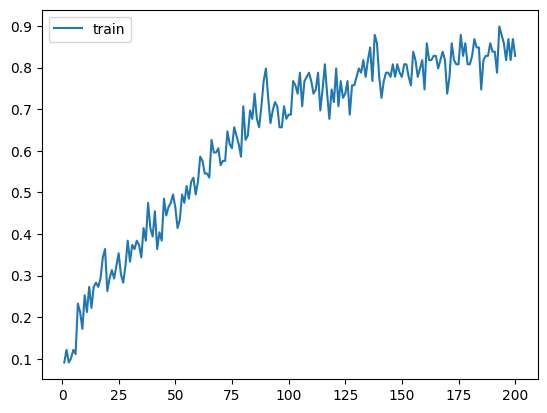

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['accuracy'], label='train')
plt.show()

# Utilizar modelo

In [42]:
message = "Hola, quiero helado"

# preprocesamiento + lematizacion
# ------------------------------------------
# Transformar la pregunta (input) en tokens y lematizar
lemma_words = []
tokens = preprocess_clean_text(message).split(" ") # ["hola", "como", estas]
print('tokens', tokens)

for token in tokens:
    print('token', token)
    lemma = lemma_lookupTable.get(token)
    if lemma is not None:
        lemma_words.append(lemma)

# Transformar los tokens en "Bag of words" (arrays de 1 y 0)
bow = []
for word in vocab:
    bow.append(1) if word in lemma_words else bow.append(0)
# ------------------------------------------
print(bow)


tokens ['hola', 'quiero', 'helado']
token hola
token quiero
token helado
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [43]:
# Toma un conjunto de características (bow), realiza una predicción de
# clases utilizando un modelo (model), y luego imprime la clase predicha.
#La relación entre índices y clases se obtiene a partir de la lista classes.

probs = model.predict([bow])
clase_candidata = probs.argmax(axis=1)[0]
print(clase_candidata)
classes[clase_candidata]

1/1 [==============================] - 0s 80ms/step
11


'pedido'

In [44]:
# este bucle for recorre todas las intenciones en data["intents"] y asigna las respuestas
# de cada intención a la sublista correspondiente en responses basándose en la clase asociada a esa intención.
responses = [[""]] * len(classes)
for intent in data["intents"]:
    responses[classes.index(intent["tag"])] = intent["responses"]

responses

[['¡De nada! Estamos felices de ayudarte. ¿Hay algo más en lo que podamos colaborar?',
  '¡Gracias a ti por elegir Heladerías Frozen! ¿Necesitas algo más?'],
 ['¡Hola! Bienvenido a Heladerías Frozen.',
  '¡Hola, espero estes muy bien. Bienvenido a Heladerías Frozen!'],
 ['Perfecto. ¿Quieres agregar algo más a tu pedido?',
  'Entendido. ¿Deseas incluir algo más en tu pedido?'],
 ['Tenemos una variedad de sabores, como Chocolate, Granizado, Limon y Dulce de Leche . ¿Tienes algún sabor en mente?'],
 ['Podes contactarnos al siguiente número +54-9-11-111-1111',
  'Contactonos al whatsapp número +54-9-11-2222-2222'],
 ['Hasta luego. ¡Que tengas un gran día!',
  'Adiós. ¡Esperamos verte de nuevo pronto en Heladerías Frozen!'],
 ['Perfecto, ¿algún tamaño en particular para tu helado?',
  '¡Excelente elección! ¿Qué tamaño prefieres?'],
 ['Perfecto. Buena elección.'],
 ['Los envios se realizan por medio de delivery, lo enviaremos a la dirección que registres en la página'],
 ['Mi nombre es Froze

In [45]:
for i in range(5):
    message = input("")

    # preprocesamiento + lematizacion
    # ------------------------------------------
    # Transformar la pregunta (input) en tokens y lematizar
    lemma_words = []
    tokens = preprocess_clean_text(message).split(" ")
    for token in tokens:
        lemma = lemma_lookupTable.get(token)
        if lemma is not None:
            lemma_words.append(lemma)

    # Transformar los tokens en "Bag of words" (arrays de 1 y 0)
    bow = []
    for word in vocab:
        bow.append(1) if word in lemma_words else bow.append(0)
    # ------------------------------------------

    probs = model.predict([bow])
    score = probs.max()
    if score > 0.4:  # threshold 0.4
        index = probs.argmax(axis=1)[0]
        result = random.choice(responses[index])
        print(f"[{score:.2f}]: {result}")
    else:
        print(f"[{score:.2f}] Perdon, no comprendo la pregunta.")

KeyboardInterrupt: Interrupted by user

# Descargar modelo

In [46]:
# Exportar los datos importants (vocabulario, clases, el bot y el dataset utilizado)
import pickle
import json

pickle.dump(vocab, open('vocab.pkl','wb'))
pickle.dump(responses, open('responses.pkl','wb'))
model.save('frozenbot.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
# Comprimir todos los datos necesarios
!zip -r frozenbot_data.zip frozenbot.h5 vocab.pkl responses.pkl lematizacion-es.pickle

updating: frozenbot.h5 (deflated 25%)
updating: vocab.pkl (deflated 45%)
updating: responses.pkl (deflated 55%)
updating: lematizacion-es.pickle (deflated 77%)


In [48]:
from google.colab import files
files.download('frozenbot_data.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>